# 무신사 크롤링

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from bs4 import BeautifulSoup

In [3]:
def get_msa_review(page=1, goodsNo=2064478):
    url = f"https://goods.musinsa.com/api/goods/v1/review/style/list?similarNo=0&sort=new&selectedSimilarNo=0&page={page}&goodsNo={goodsNo}&_=1645664653361"
    headers = {
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    
    bs = BeautifulSoup(response.text, "html.parser")
    elements = bs.select("#reviewListFragment > div.review-list")
    data = []
    for element in elements:
        data.append({
        "id": element.select_one("div.review-profile > div.review-profile__text-wrap > div.review-profile__text > p.review-profile__name").text,
        "content": element.select_one("div.review-contents > div.review-contents__text").text,
        "comment_count": element.select_one("span.review-list__comment-wrap > span.review-list__comment").text
    })
    return pd.DataFrame(data)

In [4]:
df = pd.DataFrame()
for i in range(100):
    df = pd.concat([df, get_msa_review(i + 1)])
df

,id,content,comment_count
0,LV 5워니지로,요즘 날씨 입기에 딱 좋아요 폼이 좀 크긴 하지만 내피 장착해서 입으니 핏 좋네요,0개
1,LV 5초크리스,내피가 많이 안맞는다는 후기가있어서 다시보았는데 음 안맞는거같긴한데 크게 신경쓰일정...,0개
2,LV 5칭화대학교,내피만 착용했는데도 너무 이쁘네요 고민하지말고 바로 구입하셔도 됩니다,0개
3,LV 4Wjh5590,가격도 저렴하고 옷도 따뜻하고 너무 좋아요 생각보다 사이즈는 조금 크네요,0개
4,LV 4djagh,가성비 좋습니다안에 깔깔이도 있어서 겨울에도 어느정도 따뜻해요,0개
...,...,...,...
5,LV 5굳옹,사이즈가 커서 당황했는데 큰 맛으로 입기 너무 좋아요,0개
6,LV 61836281,대충 막 입으려고 샀어요 가성비 오지는 템이네요,0개
7,LV 4hhhll,패딩 대신에 내피끼고 입으니 겨울로 이게 딱입니다,0개
8,LV 5박지후고객,"옷은 전체적으로 마음에 들어요. 하지만 옷 자체결함인지, 오른쪽 지퍼부분이 자꾸 바...",0개


## 워드클라우드 생성

In [5]:
import konlpy
from konlpy.tag import *
from nltk import Text
from wordcloud import WordCloud

In [6]:
text = " ".join(df["content"].values)
len(text), text[:50]

(54166, '요즘 날씨 입기에 딱 좋아요 폼이 좀 크긴 하지만 내피 장착해서 입으니 핏 좋네요 내피가 ')

In [24]:
okt = Okt()
nouns = okt.nouns(text)
article = Text(nouns, name="article")
datas = article.vocab()
wc = WordCloud(font_path="D2Coding.ttf", background_color="white", width=1600, height=1600, colormap = 'summer', mask=mask)

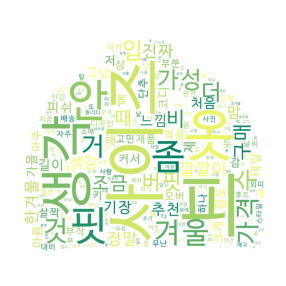

In [10]:
plt.figure(figsize=(20, 5))
plt.imshow(wc.generate_from_frequencies(datas))
plt.axis('off')
plt.show()

In [15]:
df_fdist = pd.DataFrame.from_dict(datas, orient='index')
df_fdist.columns = ['count']
df_fdist
df_fdist.sort_values(by='count', ascending=False).iloc[10:20]

,count
가격,82
수,82
가성,81
입,79
버핏,76
더,76
비,74
구매,66
때,64
조금,60


In [18]:
stop_words = ['피', '옷', '생각', '안', '좀', '것', '거','수','입','더','비','때','조금', '가성', '버핏']
words = dict(datas)
for stop_word in stop_words:
  del words[stop_word]

In [16]:
words['가성비'] = words['가성']
words['오버핏'] = words['버핏']

In [23]:
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(1000,1500), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('picture2.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)

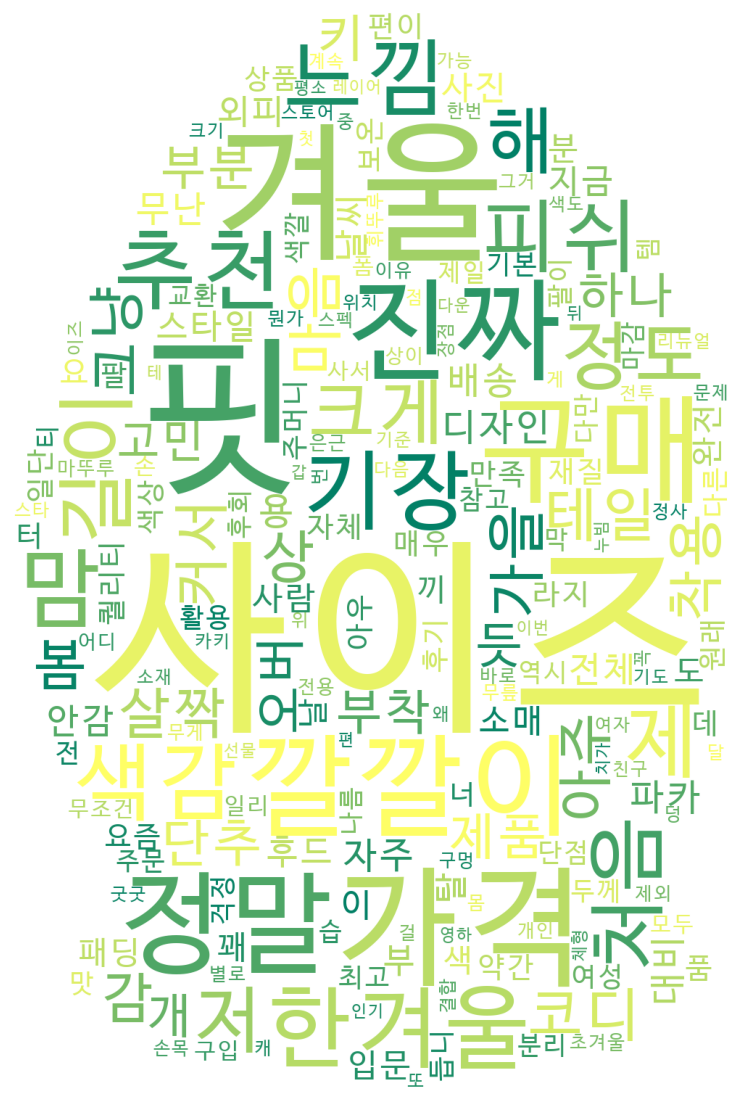

In [25]:
plt.figure(figsize=(40, 20))
plt.imshow(wc.generate_from_frequencies(words))
plt.axis('off')
plt.show()

In [27]:
df_fdist = pd.DataFrame.from_dict(words, orient='index')
df_fdist.columns = ['count']
df_fdist
df_fdist.sort_values(by='count', ascending=False).iloc[:10]

,count
사이즈,239
핏,148
겨울,111
가격,82
구매,66
진짜,59
깔깔이,59
정말,58
한겨울,55
추천,53
